
## Outlines

- Data Wrangling and cleaning
- Data preprocessing
- Modeling

## Notes
- <span style="color:red">**PROVE ALL YOUR ANSWERS WITH GRAPHS IF AVAILABLE**.
- All Mentioned Models **MUST** be used.
- Read the problems well, before you start solving.
- The solution **MUST** pass all the test cases.
- Feel free to add more cells to develope the program, **BUT** make sure you gather them in ONE adequately working code cell.  

#### **Good Luck**

## <span style="color:blue">Problem statment

The provided dataset addresses an income classification problem, aiming to determine whether annual income is anticipated to be below or above $50,000 based on given features. While a feature description is provided, further independent research is encouraged for a comprehensive understanding of the problem.


## <span style="color:blue">Requirments
    
   
- **1)** Explaratory Data Analysis.
     - Assess Data Cleanliness.
     - Handle Missing Values.
     - Address missing values in the dataset.
     - Explore Salary Influencing Variables.
     - Identify variables that may impact salary status.
     - Utilize Statistical Techniques.
     - Apply statistical methods.
     - Consider Variable Reduction.


- **2)** Model Building:
    - Conduct preprocessing and feature selection.
    - Build four classification models: K-Nearest Neighbor, Support Vector Machine, Decision Tree, and Random Forest.
    - Implement necessary preprocessing steps for each model..
   
    
- **3)** Model Evaluation:
     - Compare the results of the four models using a **Classification Report**.
     - Provide insightful comments on the performance of each model.          
    
- **4)** Answer the following Question:
    -   **A)** We want to build 3 AI models :
        - One can detect skin cancer
        - One can detect spam messages and move them to the trash
        -  One can classify fruits
  - knowing that all of your datasets for these projects are unbalanced . What is the best metric you will use to report the performance for each one of these models ?
    -   **B)**  Are there any unexpected biases or disparities in the data that might indicate potential discrimination issues??
    -   **C)**  Were there any notable challenges or advantages with any specific model during the building and evaluation process??
    -   **D)**  How robust are the models to changes in the dataset or additional features? Do they generalize well to new, unseen data??


### Column Descriptions:

- **Income:** Two classes (<=50K, >50K)
- **Age:** Continuous.
- **Workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- **Fnlwgt:** Continuous.
- **Education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- **Education-num:** Continuous.
- **Marital-status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- **Occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-- inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- **Relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- **Race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- **Sex:** Female, Male.
- **Capital-gain:** Continuous.
- **Capital-loss:** Continuous.
- **Hours-per-week:** Continuous.
- **Native-country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



### Write you code here ###

**1)** Explaratory Data Analysis.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency

df = pd.read_csv('/content/income_evaluation.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [ ]:
df.isna().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### **There are one missing values**

In [ ]:
df=df.dropna()

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
from scipy.stats import pearsonr
from itertools import product
import scipy.stats as ss

categories1 = ('age', ' workclass', ' education', ' marital-status', ' occupation', ' relationship', ' race', ' sex', ' native-country' )
categories2 = (' income' , ' income')

In [ ]:
cat_var_prod = list(product(categories1,categories2, repeat = 1))
cat_var_prod = list(set(cat_var_prod))

In [ ]:
result = []
for i in cat_var_prod:
    if i[0] != i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(
                            df[i[0]], df[i[1]])))[1]))
result = list(set(result))

In [ ]:
result

[(' race', ' income', 2.305960610160958e-70),
 (' education', ' income', 0.0),
 (' occupation', ' income', 0.0),
 (' native-country', ' income', 2.2113858852543023e-44),
 (' workclass', ' income', 2.026505431120716e-220),
 (' sex', ' income', 0.0),
 ('age', ' income', 0.0),
 (' relationship', ' income', 0.0),
 (' marital-status', ' income', 0.0)]

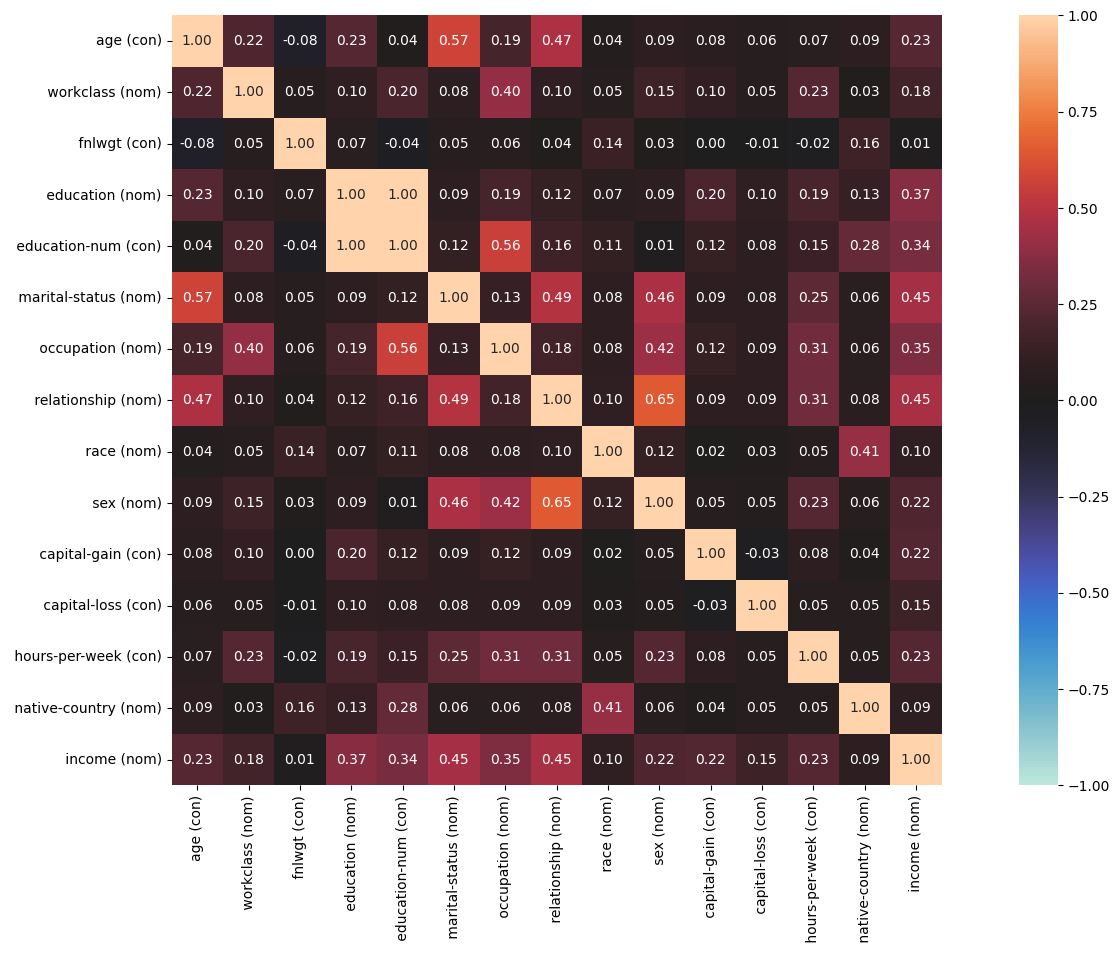

In [ ]:
!pip install dython
from dython import nominal
nominal.associations(df,figsize=(20,10),mark_columns=True);

In [ ]:
from scipy.stats import pointbiserialr
from scipy.stats.contingency import association


In [ ]:
ageAndIncome = association(pd.crosstab(index=df['age'], columns=df[' income']))
ageAndIncome

0.32795289179426557

In [ ]:
for i in cat_var_prod:
  CrosstabResult = pd.crosstab(index=df[i[0]], columns=df[i[1]])
  association_metric = association(CrosstabResult)
  print('the coreelation between', i[0], 'and', i[1], 'is', association_metric)


the coreelation between  sex and  income is 0.21598015058403633
the coreelation between  marital-status and  income is 0.4474038365741476
the coreelation between  occupation and  income is 0.3518924989720748
the coreelation between  relationship and  income is 0.45358492718148957
the coreelation between  education and  income is 0.3688382910002382
the coreelation between  race and  income is 0.10081216080655508
the coreelation between  native-country and  income is 0.09870485674433296
the coreelation between  workclass and  income is 0.1792076202095948
the coreelation between age and  income is 0.32795289179426557


In [ ]:
association(pd.crosstab(df[' education'], df[' education-num']))

1.0

# charts

In [ ]:
import matplotlib.pyplot as plt

<Axes: xlabel=' education', ylabel='count'>

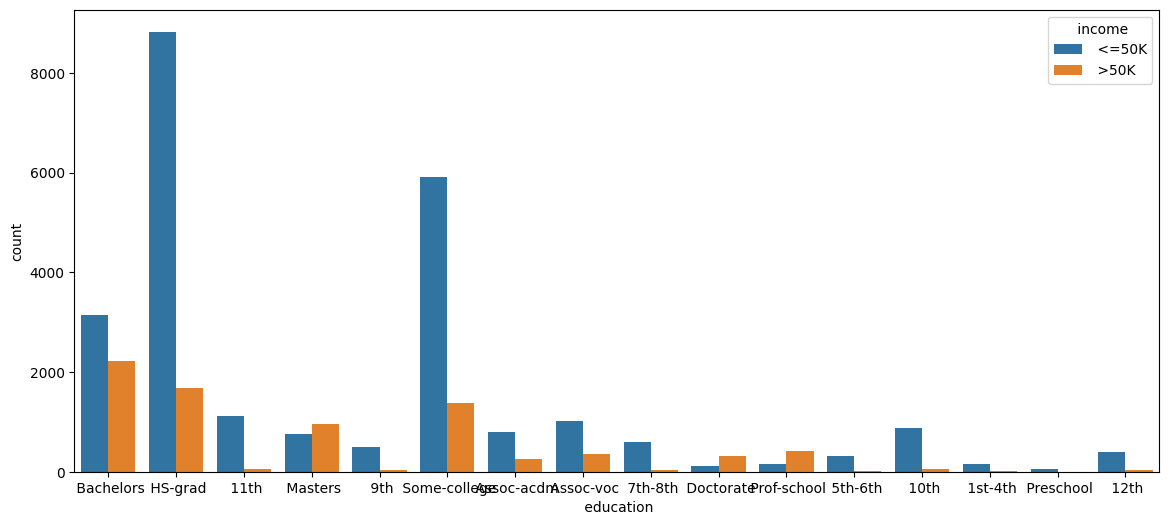

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(x=' education', data=df, hue=' income')

<Axes: xlabel=' workclass', ylabel='count'>

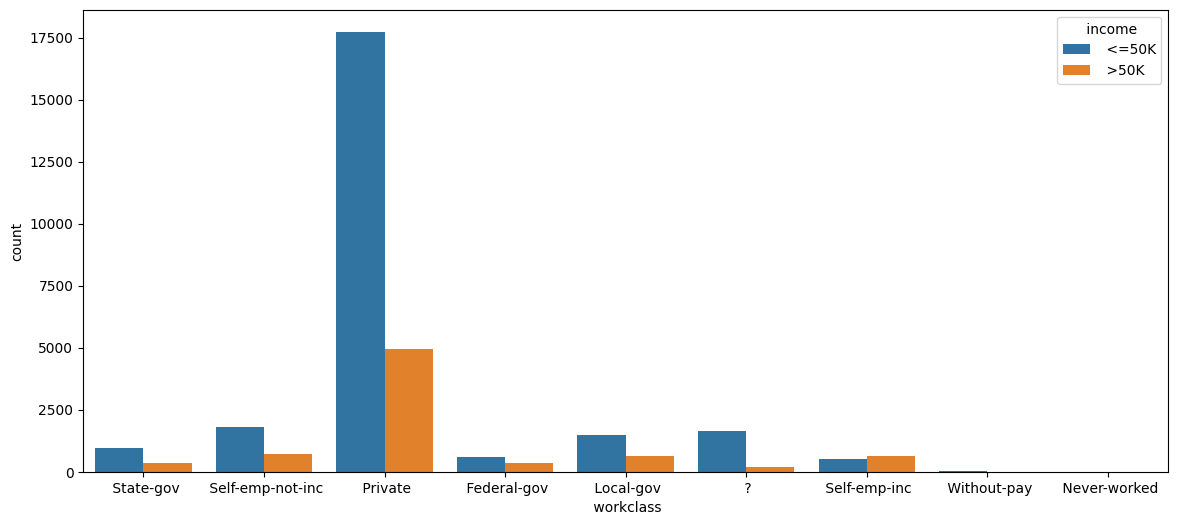

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(x=' workclass', data=df, hue=' income')

<Axes: xlabel=' sex', ylabel=' hours-per-week'>

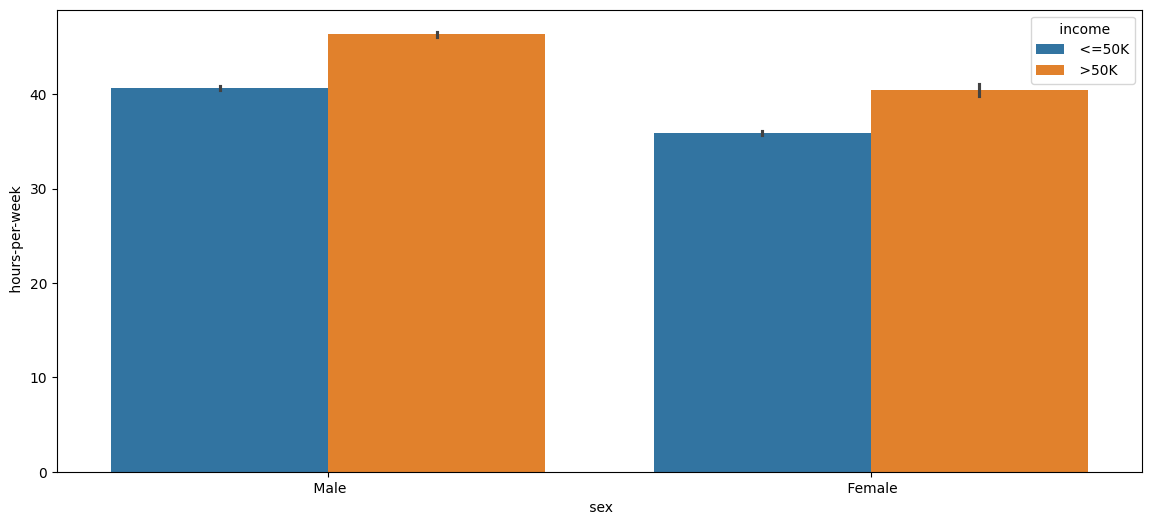

In [ ]:
plt.figure(figsize=(14,6))
sns.barplot(x=' sex', y=' hours-per-week', data=df, hue=' income')

In [ ]:
df.groupby(' sex')[' hours-per-week'].mean()

 sex
 Female    36.410361
 Male      42.428086
Name:  hours-per-week, dtype: float64

<Axes: xlabel=' marital-status'>

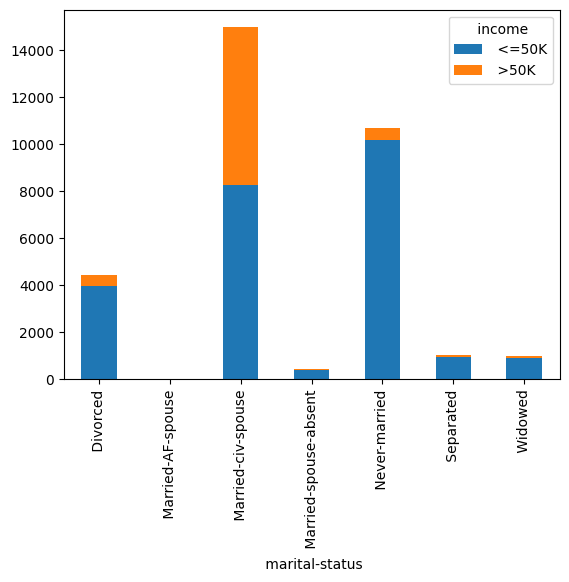

In [ ]:
df.groupby([' marital-status', ' income']).size().unstack().plot(kind='bar', stacked=True)

In [ ]:
df.groupby(' sex')[' hours-per-week'].mean()

 sex
 Female    36.410361
 Male      42.428086
Name:  hours-per-week, dtype: float64

**2)** Model Building

In [ ]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df = df[df[' workclass']!=' ?']
df = df[df[' occupation']!=' ?']

In [ ]:
df=df.drop([' native-country', ' education'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(' income',axis=1), df[' income'], test_size=0.25)


In [ ]:
import sklearn

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse_output=False)

In [ ]:
encodings = encoder.fit_transform(X_train[[' workclass', ' marital-status', ' occupation', ' relationship', ' race' , ' sex']])

In [ ]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [ ]:
encodings_df = pd.DataFrame(encodings, columns=encoder.get_feature_names_out())
encodings_df.head(3)

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
X_train = pd.concat([X_train, encodings_df], axis=1 )
X_train = X_train.drop([' workclass', ' marital-status', ' occupation', ' relationship', ' race', ' sex'], axis=1)
X_train.head(2)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,51,289572,13,7688,0,50,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,32,193231,9,0,0,40,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
encoding_test = encoder.transform(X_test[[' workclass', ' marital-status', ' occupation', ' relationship', ' race'  , ' sex']])

In [ ]:
encoding_test = pd.DataFrame(encoding_test, columns=encoder.get_feature_names_out())
encoding_test.head(3)

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
from sklearn.decomposition import PCA


In [ ]:
encoder_target = LabelEncoder()

In [ ]:
y_train_encoding = encoder_target.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoding = encoder_target.transform(y_test.values.reshape(-1, 1))
y_train_encoding

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([1, 0, 0, ..., 1, 1, 1])

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10)

In [ ]:
dt.fit(encodings_df, y_train_encoding)
prediction_tree = dt.predict(encoding_test)
accuracy_score(y_test_encoding, prediction_tree)


0.8098958333333334

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)

In [ ]:
rf.fit(encodings_df, y_train_encoding)
prediction_random = rf.predict(encoding_test)
accuracy_score(y_test_encoding, prediction_random)

0.8130208333333333

### knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)

In [ ]:
knn.fit(encodings_df, y_train_encoding)
prediction_knn = knn.predict(encoding_test)
accuracy_score(y_test_encoding, prediction_knn)

0.8123697916666667

### SVC

In [ ]:
from sklearn.svm import SVC
svm = SVC()


In [ ]:
svm.fit(encodings_df, y_train_encoding)
prediction_svc = svm.predict(encoding_test)
accuracy_score(y_test_encoding, prediction_svc)

0.8184895833333333

**3)** Model Evaluation

In [ ]:
!pip install scikit-learn


In [ ]:
from sklearn import metrics


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
clf_report_tree = classification_report(y_test_encoding, prediction_tree)
print(clf_report_tree)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      5792
           1       0.63      0.54      0.58      1888

    accuracy                           0.81      7680
   macro avg       0.74      0.72      0.73      7680
weighted avg       0.80      0.81      0.80      7680



In [ ]:
clf_report_rand = classification_report(y_test_encoding, prediction_random)
print(clf_report_rand)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      5792
           1       0.64      0.54      0.59      1888

    accuracy                           0.81      7680
   macro avg       0.75      0.72      0.73      7680
weighted avg       0.80      0.81      0.81      7680



In [ ]:
clf_report_knn = classification_report(y_test_encoding, prediction_knn)
print(clf_report_knn)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      5792
           1       0.64      0.55      0.59      1888

    accuracy                           0.81      7680
   macro avg       0.75      0.72      0.73      7680
weighted avg       0.80      0.81      0.81      7680



In [ ]:
clf_report_svc = classification_report(y_test_encoding, prediction_svc)
print(clf_report_svc)

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      5792
           1       0.66      0.55      0.60      1888

    accuracy                           0.82      7680
   macro avg       0.76      0.73      0.74      7680
weighted avg       0.81      0.82      0.81      7680



**4)** Answer the following Questions

In [ ]:
#A , B , D and C

### A. When evaluating imbalanced data, the F1 score is often considered the best metric. The F1 score is the harmonic mean of precision and recall, providing a balance between the two. It is particularly useful because it gives a single measure of model performance by taking both false positives and false negatives into account. Other useful metrics include the Area Under the Precision-Recall Curve (AUPRC) and Matthews Correlation Coefficient (MCC), which are also designed to handle the challenges posed by imbalanced datasets.




### B. 'native-country' column which more than 90% of data is USA country. And workclass column with 'private' entries around 70%. And the target column is biased.

### C. I hope I had more time to work deeply on feature engineering. but overall, the project needs to be treated carefully.

###  D.The models work very well with current data. However, the mdoel performacne will decrease after time because of changing data. I suggest to retrain the model periodically to keep it up with new data. In our case, an employee income based on current features and those features would change in time (ex. inflation).

## Great Job.